In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv(r'../output/cleaned/complete_dataframe.csv')
df1 = df.copy()

In [9]:
df1.head(2)

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,doctors,hospital,pharmacy,Cas cumulés,Nouveau cas,Décès cumulés,Nouveaux décès,positivité,létalité,airport
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,17.0,184.0,81.0,443,0,34,1,0.395,0.077,0.0
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,0.0,73.0,21.0,378,0,5,1,0.447,0.013,0.0


In [10]:
# Compute new agregate values from existed ones
df1['clinic_per_100000'] = df1['clinic']/(df1['Population'] /100000)
df1['doctor_per_100000'] = df1['doctors']/(df1['Population'] /100000)
df1['hospital_per_100000'] = df1['hospital']/(df1['Population'] /100000)

In [11]:
df1.head()

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,...,Cas cumulés,Nouveau cas,Décès cumulés,Nouveaux décès,positivité,létalité,airport,clinic_per_100000,doctor_per_100000,hospital_per_100000
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,...,443,0,34,1,0.395,0.077,0.0,0.488484,0.830422,8.988097
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,...,378,0,5,1,0.447,0.013,0.0,0.000000,0.000000,8.632985
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918,4.0,...,154,0,12,0,0.470,0.078,1.0,0.831488,0.000000,13.303815
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639,1.0,...,124,0,4,0,0.399,0.032,0.0,0.284420,0.000000,10.807951
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807,30.0,...,360,3,25,0,0.471,0.069,1.0,2.586740,0.603573,9.226039


In [12]:
df1['tested_case'] = df1['Cas cumulés'] / df1['positivité']
df1

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,...,Nouveau cas,Décès cumulés,Nouveaux décès,positivité,létalité,airport,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,...,0,34,1,0.395,0.077,0.0,0.488484,0.830422,8.988097,1121.518987
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,...,0,5,1,0.447,0.013,0.0,0.000000,0.000000,8.632985,845.637584
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918,4.0,...,0,12,0,0.470,0.078,1.0,0.831488,0.000000,13.303815,327.659574
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639,1.0,...,0,4,0,0.399,0.032,0.0,0.284420,0.000000,10.807951,310.776942
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807,30.0,...,3,25,0,0.471,0.069,1.0,2.586740,0.603573,9.226039,764.331210
5,Nord-Est,Fort-Liberté,1805,HT,444463,247,"Fort-Liberté, Arrondissement de Fort-Liberté, ...",19.663561,-71.836705,23.0,...,0,5,0,0.235,0.028,0.0,5.174784,0.000000,12.374483,765.957447
6,Nord-Ouest,Port-de-Paix,2176,HT,868580,400,"Port-de-Paix, Arrondissement Port-de-Paix, Dép...",19.938986,-72.830813,2.0,...,0,10,0,0.424,0.059,1.0,0.230261,0.000000,10.246609,400.943396
7,Ouest,Port-au-Prince,4827,HT,5010205,1039,"Port-au-Prince, Arrondissement de Port-au-Prin...",18.547327,-72.339593,74.0,...,9,73,3,0.396,0.014,3.0,1.476985,0.638696,8.283094,13578.282828
8,Sud,Les Cayes,2794,HT,791084,284,"Commune Les Cayes, Arrondissement des Cayes, D...",18.194443,-73.751160,3.0,...,0,6,0,0.544,0.029,1.0,0.379226,1.137679,14.031380,386.029412
9,Sud-Est,Jacmel,2023,HT,893900,443,"Jacmel, Arrondissement de Jacmel, Département ...",18.235259,-72.537513,1.0,...,0,8,0,0.483,0.037,1.0,0.111869,0.111869,8.725808,445.134576


df1['test'] = (df1['létalité'] * df1['Cas cumulés']) - df1['Décès cumulés']
df1

In [15]:
df1['tested_case_per_100000'] = df1['tested_case']/(df1['Population'] /100000)

In [16]:
new_df = df1[['Département', 'Density/km²', 'clinic_per_100000', 'doctor_per_100000', 'hospital_per_100000', 'tested_case_per_100000', 'positivité', 'létalité', 'airport']]
new_df

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0


In [ ]:
new_df['score'] = 

normalized_X = preprocessing.normalize(new_df.iloc[:,1:])
normalized_X

standardized_X = preprocessing.scale(new_df.iloc[:,1:])
standardized_X

In [20]:
new_df.iloc[:,1:]

,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport
0,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0
1,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0
2,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0
3,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0
4,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0
5,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0
6,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0
7,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0
8,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0
9,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0


In [153]:
# Standarize features
scaler = RobustScaler()
X_std = scaler.fit_transform(new_df.iloc[:,1:])

!pip install yellowbrick

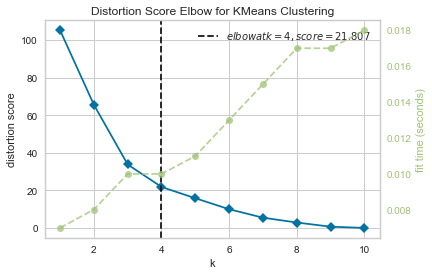

In [154]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [155]:
# Create k-mean object
clt = KMeans(n_clusters=4, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(normalized_X)

In [156]:
# View predict class
model.labels_

array([1, 3, 0, 0, 1, 2, 1, 0, 1, 1])

In [157]:
new_df['cluster_label'] = model.labels_
new_df

C:\Users\bootcamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,1
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,3
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,1
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0,2
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,1
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,0
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,1
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,1


In [158]:
new_df[new_df.cluster_label == 0]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,0
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,0


In [159]:
new_df[new_df.cluster_label == 1]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,1
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,1
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,1
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,1
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,1


In [160]:
new_df[new_df.cluster_label == 2]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
5,Nord-Est,247,5.174784,0.0,12.374483,172.333231,0.235,0.028,0.0,2


In [161]:
new_df[new_df.cluster_label == 3]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
1,Centre,231,0.0,0.0,8.632985,100.005154,0.447,0.013,0.0,3


In [171]:
df_score =new_df.iloc[:,1:]

In [206]:
df_score

,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
0,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,1
1,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,3
2,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,0
3,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,0
4,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,1
5,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0,2
6,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,1
7,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,0
8,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,1
9,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,1


In [207]:
x = df_score.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_score_1 = pd.DataFrame(x_scaled)
df_score_1

,0,1,2,3,4,5,6,7,8
0,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,0.333333
1,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,1.000000
2,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,0.000000
3,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,0.000000
4,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,0.333333
5,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,0.666667
6,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,0.333333
7,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,0.000000
8,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,0.333333
9,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,0.333333


In [208]:
df_score_1['Département'] = new_df['Département']

In [209]:
list__ = ['Département']
for i in df_score_1.columns.tolist()[:-1]:
    list__.append(i)
list__

['Département', 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [210]:
df_score_1 = df_score_1[list__]
df_score_1

,Département,0,1,2,3,4,5,6,7,8
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,0.333333
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,1.000000
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,0.000000
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,0.000000
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,0.333333
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,0.666667
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,0.333333
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,0.000000
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,0.333333
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,0.333333


In [211]:
new_df_1 = pd.DataFrame()
for a, b in zip(new_df.columns.tolist(), df_score_1.columns.tolist()):
    new_df_1[a] = df_score_1[b]
    
new_df_1['cluster_label'] = model.labels_
new_df_1

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,1
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,3
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,0
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,0
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,1
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,2
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,1
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,0
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,1
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,1


In [212]:
new_df_1['score'] = new_df_1.positivité*3 + new_df_1.létalité*4 + new_df_1.tested_case_per_100000*(-2) + new_df_1.hospital_per_100000*(-3) + new_df_1.doctor_per_100000*(-2) + new_df_1.clinic_per_100000*(-2) + new_df_1['Density/km²']*1 + new_df_1.airport*1
new_df_1

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label,score
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,1,3.622582
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,3,1.396714
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,0,3.511409
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,0,1.016369
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,1,3.739489
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,2,-4.314668
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,1,4.094471
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,0,-0.069000
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,1,-0.786477
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,1,3.977108


In [213]:
new_df_1['rank'] = new_df_1['score'].rank()
new_df_1

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,cluster_label,score,rank
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,1,3.622582,7.0
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,3,1.396714,5.0
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,0,3.511409,6.0
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,0,1.016369,4.0
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,1,3.739489,8.0
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,2,-4.314668,1.0
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,1,4.094471,10.0
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,0,-0.069000,3.0
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,1,-0.786477,2.0
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,1,3.977108,9.0
